# KNN

Classification algorithim that operates on simple principle.<br>
We plot our sample data based on a feature and measure new points based on their distance to $k$ number of nearby samples<br>
We classify our new point based on whichever class is the majority in $k$

#### Choosing a $k$ is key as it can affect which class we assign to

Classic Bias-Variance tradeoff, as $k$ increases, less choppy but more mislabeling

### Pros

1. Very simple
2. Training is trivial, have only to sort our data
3. Works with any number of classes
4. Easy to add more data
5. Few parameters:<br>
    a. $k$<br>
    b. Distance metric (*How are we defining the distance between points*)

###  Cons

1. High prediction cost (?), worse for large datasets
2. Not good with high dimensional data
3. Categorical features don't work well with KNN

Common task for data scientist position, be given anonymized data and attempt to classify without giving context for the data.

## KNN with Python

In [1]:
import os
os.chdir('C://Users//andre.bravo//Documents//python//Python-Data-Science-and-Machine-Learning-Bootcamp/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/K-Nearest-Neighbors')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data', index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


We have no information on these features. Only that they lead to a target class, 0 or 1

## Standardization

Because KNN classifier predicts class of any given observation by identifying the class of the observations nearest to it, variable scales matter.<br>
Any variables that are in a large scale will have larger effect on distances between observations.<br>
As such, we need to Standardize everything to the same scale

In [6]:
from sklearn.preprocessing import StandardScaler

#### We instantiate a scaler:

In [12]:
scaler = StandardScaler()

#### Fit to features, not target class

Drop the TARGET CLASS column along the column (axis=1) axis

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Transform method to perform standardization by centering and scaling

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,
                                                    df['TARGET CLASS'],
                                                    test_size=0.3,
                                                    random_state=101)

## Using the Elbow Method: K Nearest Neighbours

### Begin with $k=1$

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Can we make this better by choosing a better $k$ value?

### Elbow method

Iterate many models, using different k values, and plot out error rate<br>
See which has the lowest error rate

In [34]:
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #make error rate the avg of where pred_i != y_test
    error_rate.append(np.mean(pred_i != y_test))

#### Let's plot the errors nicely against the range of $k$

Text(0.5, 1.0, 'Error Rate vs K ')

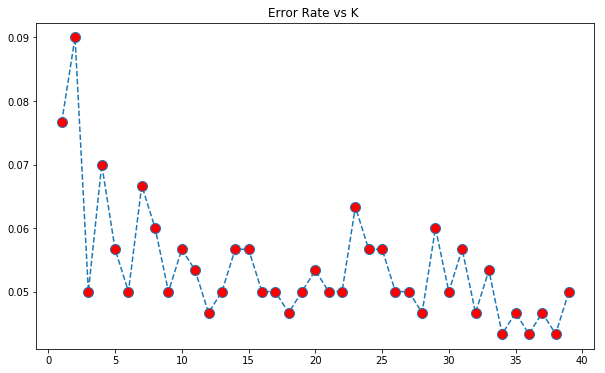

In [43]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),
         error_rate,
        linestyle='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=10)

plt.title('Error Rate vs K ')

In [39]:
min(error_rate)

0.043333333333333335

We want minimum error, I'm going to put this in a dataframe and find Min

In [51]:
np.array(range(1,40)).shape

(39,)

In [56]:
np.array(error_rate).shape

(39,)

In [79]:
error_df = pd.DataFrame(data=np.array(error_rate),
                        index=range(1,40),
                       columns=['error_rate'])

In [88]:
error_df[error_df['error_rate']==error_df['error_rate'].min()] 

,error_rate
34,0.043333
36,0.043333
38,0.043333


Fairly high K values tha bounce up and down, check other alternatives

In [90]:
error_df.sort_values(by='error_rate').head(10)

,error_rate
36,0.043333
38,0.043333
34,0.043333
12,0.046667
37,0.046667
35,0.046667
18,0.046667
32,0.046667
28,0.046667
21,0.050000


At this point, course chooses to go with $k=17$, but note that 12 or 18 could be better. Try both

In [95]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[155   4]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Similar result for both, go with 12